In [440]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

In [441]:
def padronizar_normal(matriz_X):
    for i in range(np.shape(matriz_X)[1]):
        matriz_X[:,i] = (matriz_X[:,i] - np.mean(matriz_X[:,i]))/np.std(matriz_X[:,i]) # X menos media/desvio padrao

    return matriz_X

def normalizar(X):
    min_values = X.min(axis=0)
    max_values = X.max(axis=0)
    X = (X - min_values) / (max_values - min_values)
    return X


In [442]:
"""dataframe_original = pd.read_csv('creditcard.csv')
print("Dimensões do dataframe: ",dataframe_original.shape)
print("Quantidades de cada classe:", dataframe_original['Class'].value_counts())
# Reduzindo a quantidade de amostras para 10000 da classe 0 e todas da classe 1
dataframe_original = dataframe_original.sample(frac=1) # embaralhando as amostras
fraude = dataframe_original.loc[dataframe_original['Class'] == 1]
nao_fraude = dataframe_original.loc[dataframe_original['Class'] == 0][:10000]
dataframe_reduzido = pd.concat([fraude, nao_fraude])
dataframe_reduzido.to_csv('creditcard_reduced.csv', index=False)"""

Dimensões do dataframe:  (284807, 31)
Quantidades de cada classe: Class
0    284315
1       492
Name: count, dtype: int64


In [443]:
data = pd.read_csv('creditcard_reduced.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
1,62080.0,-1.599457,2.607720,-2.987193,3.064156,-2.497914,-0.541103,-2.277786,1.268166,-1.997331,...,0.662933,0.184087,-0.089452,-0.506000,-0.062259,-0.052714,0.322854,0.135268,180.00,1
2,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
3,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
4,102622.0,-2.877176,4.569649,-9.553069,4.441079,-3.653961,-1.877981,-3.514353,1.547608,-2.503304,...,1.272896,1.300268,-0.003950,-0.360848,-0.597526,-0.390901,0.592197,-0.241010,346.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,29135.0,1.148470,-0.226385,-1.378984,-0.501250,2.115918,3.156576,-0.191150,0.725852,-0.240172,...,-0.497682,-1.855851,0.146490,0.960612,0.220649,-0.123232,-0.058349,0.027293,94.31,0
10488,161456.0,0.098372,0.881126,-0.412761,-0.501913,0.817211,-0.925919,0.864430,-0.038913,0.142891,...,-0.346648,-0.932954,0.134695,0.594512,-0.465915,0.113468,0.211053,0.083482,6.45,0
10489,20259.0,-0.230903,0.188957,1.950648,-1.682032,-0.491241,0.442542,-0.611728,-0.566704,2.466857,...,0.615393,-0.317370,-0.344081,-0.355076,1.492861,-0.662246,0.117670,0.129243,11.85,0
10490,32140.0,-0.818437,0.592785,0.468012,-0.279240,1.401790,-1.316362,0.647986,-0.015513,-0.784337,...,0.056923,-0.071114,-0.134238,-0.112990,-0.167753,0.148682,0.057840,0.164770,0.76,0


In [445]:
data = data.drop(['Time'], axis=1)
print(data['Class'].value_counts())
# Eu possuo 100 valores de classe 0 e 492 valores de classe 1. Deixando os valores iguals, 492 em cada classe
data = data.sample(frac=1)
fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492]
normal_distributed_data = pd.concat([fraude, nao_fraude])
print(normal_distributed_data['Class'].value_counts())


Class
0    10000
1      492
Name: count, dtype: int64
Class
1    492
0    492
Name: count, dtype: int64


In [446]:
normal_distributed_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
390,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,...,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,0.00,1
147,-2.857170,4.045601,-4.197299,5.487199,-3.070776,-1.422686,-5.651314,2.019657,-5.015491,-6.319708,...,1.080323,-0.561384,0.102678,-0.067195,-0.476931,-0.103716,1.166961,0.663632,1.00,1
266,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,-6.600461,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,4.56,1
62,-1.662937,3.253892,-7.040485,2.266456,-4.177649,-0.746925,-0.248337,1.091157,-0.307137,-5.567947,...,0.450381,0.521162,0.308325,-0.318012,-1.255362,-0.691963,0.264878,-0.130445,600.73,1
383,-5.222968,4.641827,-8.858204,7.723502,-1.507035,-2.159484,-4.205164,0.979334,-1.505637,-2.239066,...,0.561892,0.624207,0.536429,-0.628334,-0.222651,0.382208,-2.693036,0.407935,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10336,0.038348,-0.212700,0.857651,-1.342719,-0.561553,0.048672,0.257384,0.081733,-0.847012,0.053535,...,-0.432473,-0.881685,0.354429,-0.510900,-0.734810,-0.735214,0.097220,0.060896,94.85,0
3141,-0.596335,1.025136,0.997804,2.027834,0.610285,0.884556,1.129816,-0.014741,-1.384521,0.428878,...,-0.102093,-0.295799,-0.006198,-0.941887,-0.527821,-0.123388,0.112373,0.114317,139.63,0
2817,1.821671,-0.784809,-0.230265,0.462331,-1.009532,-0.262078,-0.792224,0.174565,1.211392,0.185305,...,0.241528,0.696208,0.138111,0.039598,-0.407305,0.547845,-0.039506,-0.050018,64.99,0
3596,-1.452766,0.714297,1.494422,1.637165,-0.770049,1.460804,-0.994385,1.519558,0.176155,-0.779515,...,-0.119586,-0.275174,0.078136,-0.308839,-0.507904,-0.434369,-0.131303,-0.029504,17.45,0


In [447]:
X = np.array(normal_distributed_data.drop('Class', axis=1))
Y = np.array(normal_distributed_data['Class'])
RANDOM_STATE = 2
BATCH_SIZE = 32

# Normalizando os dados
X = padronizar_normal(X) # Nesse caso, utilizaremos a padronização dos dados, pois a escala dos dados é importante para o treinamento da rede neural

In [448]:
# Separando em dados de treino, teste e validação
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train, Y_train, test_size=0.2, random_state=RANDOM_STATE)

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_val:', X_val.shape)
print('Y_val:', Y_val.shape)

X_train: (629, 29)
Y_train: (629,)
X_val: (158, 29)
Y_val: (158,)


In [449]:
# Encontrando o número de neurônios na camada escondida
num_neuronios = (X_train.shape[0] - 10)/(10*(X_train.shape[1] + 2))
num_neuronios

1.9967741935483871

In [450]:
# Criando a rede neural
model = Sequential()
# Adicionando neurônios em uma camada oculta
model.add(Dense(2, input_dim=29, kernel_initializer='normal', activation='relu')) #quantidade de neuronios na camada escondida, nº de features

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) #camada de saída

# adicionando a taxa de aprendizado
learning_rate = 0.001  # Por exemplo, vamos definir a taxa de aprendizado como 0.001

# Criando um otimizador Adam com a taxa de aprendizado desejada
otimizador = optimizers.Adam(learning_rate=learning_rate)
# Compilando o modelo
model.compile(loss = 'binary_crossentropy', optimizer = otimizador, metrics = ['accuracy'])

c:\Users\bergs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [451]:
#Treinando a rede neural
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, batch_size=BATCH_SIZE, verbose=1)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5341 - loss: 0.6904 - val_accuracy: 0.5063 - val_loss: 0.6857
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5161 - loss: 0.6840 - val_accuracy: 0.5063 - val_loss: 0.6749
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5397 - loss: 0.6732 - val_accuracy: 0.8861 - val_loss: 0.6578
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8818 - loss: 0.6554 - val_accuracy: 0.8861 - val_loss: 0.6362
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8652 - loss: 0.6278 - val_accuracy: 0.8861 - val_loss: 0.6126
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8646 - loss: 0.6141 - val_accuracy: 0.8861 - val_loss: 0.5908
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8570 - loss: 0.5943 - val_accuracy: 0.8861 - val_loss: 0.5714
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8546 - loss: 0.5765 - val_accuracy: 0.8861 - 

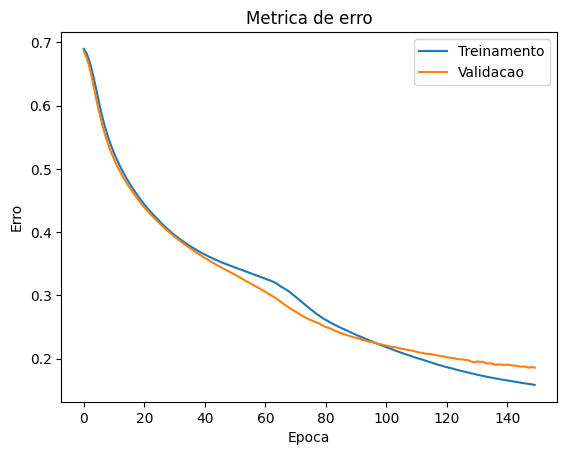

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

--> Acuracia (treino): 0.9475
--> Acuracia (validacao): 0.9241
--> acc_train - acc_val = 0.0235
--> Loss (treino): 0.1587
--> Loss (validacao): 0.1861
--> loss_train - loss_val = -0.0274


{0.0: 333, 1.0: 296}

In [452]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(Y_train, pred)

pred_val = np.round(model.predict(X_val))
acc_val = accuracy_score(Y_val, pred_val)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> Loss (treino): {history.history['loss'][-1]:.4f}")
print(f"--> Loss (validacao): {history.history['val_loss'][-1]:.4f}")
print(f"--> loss_train - loss_val = {history.history['loss'][-1] - history.history['val_loss'][-1]:.4f}")
pred_np = np.array(pred)
# encontrando os valores unicos de pred_np
unique, counts = np.unique(pred_np, return_counts=True)
dict(zip(unique, counts))


In [453]:
#descobrindo quantos valores unicos existem em pred_val
valores, contagens = np.unique(pred_val, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))

resultados


array([[ 0., 78.],
       [ 1., 80.]])

In [454]:
valores, contagens = np.unique(Y_val, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[ 0, 78],
       [ 1, 80]], dtype=int64)

In [455]:
#descobrindo quantos valores unicos existem em pred
valores, contagens = np.unique(pred, return_counts=True)

# Combina os valores únicos e as contagens correspondentes
resultados = np.column_stack((valores, contagens))
resultados

array([[  0., 333.],
       [  1., 296.]])

In [456]:
valores, contagens = np.unique(Y_train, return_counts=True)
resultados = np.column_stack((valores, contagens))
resultados

array([[  0, 312],
       [  1, 317]], dtype=int64)

In [457]:
model.evaluate(X_train, Y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9461 - loss: 0.1566


[0.158155158162117, 0.9475357532501221]

In [458]:
model.evaluate(X_val, Y_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.9196 - loss: 0.1990  


[0.18613959848880768, 0.9240506291389465]